In [1]:
#TME 1 SPLEX By TBO
"""Exploratory Analysis with Significance Tests.
    Multiple Hypothesis Testing.
    Handling Missing Data."""

'Exploratory Analysis with Significance Tests.\n    Multiple Hypothesis Testing.\n    Handling Missing Data.'

In [2]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import statsmodels.sandbox.stats.multicomp as sm

In [3]:
""" simple verification de la presence des fichiers"""
import os
from os import listdir
from os.path import isfile, join
cwd = os.getcwd().split('/')
path='/'    
for ele in [cwd[j]+'/' for j in range(1,len(cwd)-1)]:
    path+=ele
onlyfiles = [f for f in listdir(path) if isfile(join(path, f))]
if 'Data_Cortex_Nuclear.xls' and 'BreastDiagnostic.txt' in onlyfiles:
    _file_presence=True
else:
    _file_presence=False
    print 'merci de verifier la presence des fichiers de travails.'

In [4]:
#1. Load the Breast Cancer data set using pd.read table() (for the Mice Data Set you will need pd.ExcelFile())
if _file_presence:
    try:
        data1=pd.read_table( path+'BreastDiagnostic.txt',sep=',',header=None)
    except:
        print "merci de verifier le fichier BreastDiagnostic.txt "
        pass
    try:
        data2=pd.read_excel(path+'Data_Cortex_Nuclear.xls')
    except:
        print "merci de verifier le fichier Data_Cortex_Nuclear.xls.txt "
        pass

In [5]:
#2. Some data sets have missing data. You can impute them by replacing the missing values by median
#values with fillna(data, inplace=True) (you will need to impute data in the Mice Data Set)
try:
    if _file_presence and len(data1)>0 and len(data2):
        "caluler les medianes avant modifications"
        data2_mediane_dico,data1_mediane_dico= {},{}
        for j in data2.columns:
            try:
                data2_mediane_dico[j]=data2[j].median()
            except:
                pass
        for k in data1.columns:
            try:
                data1_mediane_dico[k]=data1[k].median()
            except:
                pass    
        for j in data2.columns:
            try:
                data2[j].fillna(data2_mediane_dico[j], inplace=True)
            except:
                pass
        for k in data1.columns:
            try:
                data1[k].fillna(data1_mediane_dico[k], inplace=True)
            except:
                pass         
except:
    print "verifier la question 1 "
    pass

In [6]:
#Both the Mice data set and the Breast Cancer are binary classification tasks (M and B are two
#classes in the Breast Cancer, and Ts65Dn and Control for the Mice)
try:
    if _file_presence and len(data1)>0 and len(data2):
        cpt=0
        data1_1=None
        data1_2=None
        data2_1=None
        data2_2=None

        for kv in list(set(data2['Genotype'])):
            cpt+=1    
            tmp=eval('data2_'+str(cpt))
            if (cpt==1):
                data2_1=data2[data2['Genotype']==kv]
            if (cpt==2):
                data2_2=data2[data2['Genotype']==kv]
        cpt=0
        for kj in list(set(data1[1])):
            cpt+=1
            if (cpt==1):
                data1_1=data1[data1[1]==kj]
            if (cpt==2):
                data1_2=data1[data1[1]==kj]
        print "nos 4 new data on bien été initialisé"
except:
    print "verifier la question 1 "
    pass

nos 4 new data on bien été initialisé


In [7]:
#4. Find the correlation coefficients between variables with stats.pearsonr(). Are there a lot of vari-
#ables which are strongly correlated? What is the meaning of the sign of the correlation coefficient?

#test de pearson
from scipy import stats



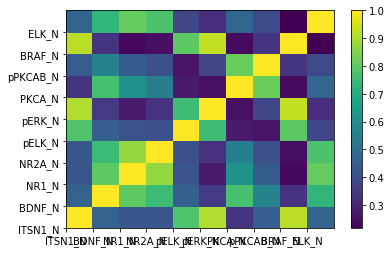

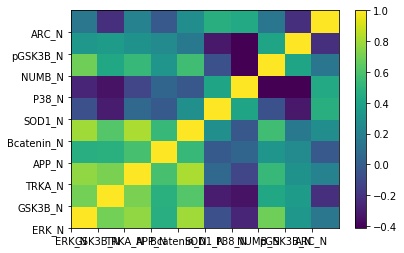

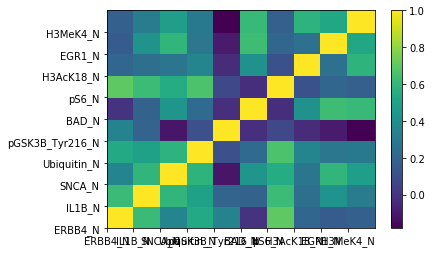

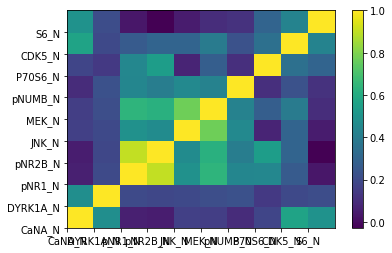

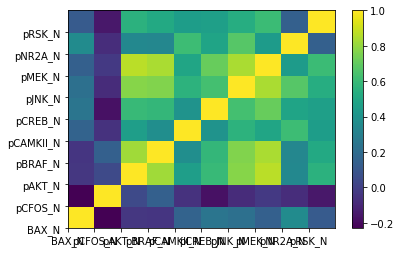

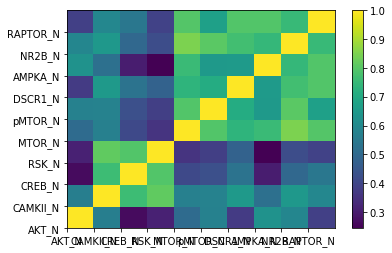

la pvalue et le R 
               variable                 P-value                     R
2784        ARC_N pS6_N                     0.0                   1.0
2785        pS6_N ARC_N                     0.0                   1.0
2782    BRAF_N DYRK1A_N                     0.0    0.9595843176197998
2783    DYRK1A_N BRAF_N                     0.0    0.9595843176197998
2780   ITSN1_N DYRK1A_N                     0.0     0.959515664692118
2781   DYRK1A_N ITSN1_N                     0.0     0.959515664692118
2778       NR1_N pNR1_N                     0.0    0.9478697711609319
2779       pNR1_N NR1_N                     0.0    0.9478697711609319
2776    pERK_N DYRK1A_N                     0.0    0.9457256498134947
2777    DYRK1A_N pERK_N                     0.0    0.9457256498134947
2774      pERK_N BRAF_N                     0.0     0.926994451298089
2775      BRAF_N pERK_N                     0.0     0.926994451298089
2772     ITSN1_N BRAF_N                     0.0    0.9176174105037036
2

In [8]:
def testallvalue(df,seuil=0.00000000000001):
    res={}
    resprint={}
    namres=[]
    for j in list(df.columns.values):
          for k in list(df.columns.values):
                if j!=k:
                        try:
                            a = df[j]
                            b = df[k]
                            testres=stats.pearsonr(a, b)[1]
                            #print stats.pearsonr(a, b)
                            if testres<seuil:
                                res[(str(k)+' '+str(j))]=stats.pearsonr(a, b)
                                if k not in namres:
                                    namres.append(k)
                        except:
                            pass
    resorder=sorted(res, key=res.__getitem__)
    try:
        p0,p1,p2=[],[],[]
        for i in range(0,len(resorder)):
            resprint[resorder[i]]=res[resorder[i]]
            p0.append(resorder[i])
            p1.append(res[resorder[i]][1])
            p2.append(res[resorder[i]][0]) 
        res=pd.DataFrame(np.transpose([p0,p1,p2]),columns=['variable','P-value','R'])
        res=res.sort_values(by=['P-value','R'], ascending=[True,False])
    except:
          print("pas de varaible correle")
    return res,namres
#generation des matrix de correlation
def plotmatrix(df,a=0,b=5):
    from numpy import corrcoef, sum, log, arange
    from numpy.random import rand
    from pylab import pcolor, show, colorbar, xticks, yticks
    if b<a:
        a,b=b,a
    if b>len(namres):
        b=len(namres)
    R = corrcoef(np.transpose(df[namres[a:b]]))
    pcolor(R)
    colorbar()
    yticks(arange(0,len(namres[a:b])),namres[a:b])
    xticks(arange(0,len(namres[a:b])),namres[a:b])
    show()

resulta,namres=testallvalue(data2)
for  k in range(0,len(namres)%10-1): 
     plotmatrix(data2,a=k*10,b=(k+1)*10)
print "la pvalue et le R "
print resulta

###Todo sauvegarder les resultats dans un fichiers et le splots et executer cela sur toutes les autres data base avec une boucle

#interpretation du signe negative de la correlation 
# todo livre 


In [9]:
#5. Run the Wilcoxon test (if you have two classes or Kruskal-Wallis test if you have more than two
#classes) stats.wilcoxon() to find variables which are significant to discriminate two classes.
#https://pythonfordatascience.org/wilcoxon-sign-ranked-test-python/
#https://www.overleaf.com/18032931wbshmmctmrhg#/68294660/
#https://github.com/nathan-rice/exploratory-data-analysis/blob/master/Exploratory%20Data%20Analysis%20in%20Python.ipynb
#https://github.com/fpsom/MRM-DM/blob/master/ClusteringMethods.ipynb
#https://www.kaggle.com/ruslankl/protein-expression-analysis
#https://pythonfordatascience.org/wilcoxon-sign-ranked-test-python/

##TODO chercher les deux axes
def wilcoxon(data):
    res={}
    for j in list(data.columns.values):
        for k in list(data.columns.values):
            if j!=k:
                try:
                    res[str(j)+"#"+str(k)]=stats.wilcoxon(data[j], data[k])
                except:
                    pass
    return res
wilcoxon(data2)

/home/traore/.local/lib/python2.7/site-packages/scipy/stats/morestats.py:2388: UserWarning: Warning: sample size too small for normal approximation.
  warnings.warn("Warning: sample size too small for normal approximation.")
/home/traore/.local/lib/python2.7/site-packages/scipy/stats/morestats.py:2413: RuntimeWarning: invalid value encountered in double_scalars
  z = (T - mn - correction) / se
/home/traore/.local/lib/python2.7/site-packages/scipy/stats/morestats.py:2388: UserWarning: Warning: sample size too small for normal approximation.
  warnings.warn("Warning: sample size too small for normal approximation.")


{'BAX_N#GluR4_N': WilcoxonResult(statistic=4074.0, pvalue=3.3746520860146776e-173),
 'pJNK_N#GFAP_N': WilcoxonResult(statistic=34.0, pvalue=3.291932443736952e-178),
 'CAMKII_N#pNUMB_N': WilcoxonResult(statistic=259525.0, pvalue=0.0030687583830780406),
 'ITSN1_N#P38_N': WilcoxonResult(statistic=68826.0, pvalue=6.297151231893379e-105),
 'SYP_N#TIAM1_N': WilcoxonResult(statistic=179928.0, pvalue=9.446384698706903e-28),
 'P3525_N#pS6_N': WilcoxonResult(statistic=0.0, pvalue=2.9950571345489026e-178),
 'S6_N#P38_N': WilcoxonResult(statistic=265781.0, pvalue=0.010941872556312604),
 'ARC_N#H3AcK18_N': WilcoxonResult(statistic=38759.0, pvalue=3.688658699575413e-134),
 'AKT_N#CDK5_N': WilcoxonResult(statistic=992.0, pvalue=4.699115202450544e-177),
 'CAMKII_N#P70S6_N': WilcoxonResult(statistic=0.0, pvalue=2.9950571345489026e-178),
 'ARC_N#SOD1_N': WilcoxonResult(statistic=0.0, pvalue=2.9950571345489026e-178),
 'PKCA_N#BDNF_N': WilcoxonResult(statistic=267734.0, pvalue=0.024130955562545044),
 'TRK

In [ ]:
##https://shiring.github.io/machine_learning/2017/01/15/rfe_ga_post  data base 1

In [ ]:
#https://www.kaggle.com/gargmanish/basic-machine-learning-with-cancer
#https://docteur-michel.fr/docteur-michel.fr/travail/Statistiques/StatsIntro.pdf